# Data Exploration for the hotels reviews

- Check data structure: (columns & rows)
- Check the whole data trends
- Check uniqueness
- frequent reviews and visualize it

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import datetime as dt
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('hotel-reviews/7282_1.csv')
data= data[data.categories=='Hotels']
data.reset_index(inplace=True)
del data['index']

### Check Data structure

In [4]:
data.describe()

,latitude,longitude,reviews.doRecommend,reviews.id,reviews.rating
count,21386.000000,21386.000000,0.0,0.0,21370.000000
mean,36.442980,-83.350867,NaN,NaN,3.664483
std,7.827689,39.268093,NaN,NaN,1.351322
min,-25.436750,-159.481416,NaN,NaN,0.000000
25%,33.529422,-109.547157,NaN,NaN,3.000000
50%,37.352307,-88.297272,NaN,NaN,4.000000
75%,41.505388,-77.473390,NaN,NaN,5.000000
max,53.566245,115.164407,NaN,NaN,10.000000


In [5]:
data.head(1).T

,0
address,Riviera San Nicol 11/a
categories,Hotels
city,Mableton
country,US
latitude,45.4216
longitude,12.3762
name,Hotel Russo Palace
postalCode,30126
province,GA
reviews.date,2013-09-22T00:00:00Z


In [6]:
data.columns

Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.userCity', 'reviews.username',
       'reviews.userProvince'],
      dtype='object')

In [7]:
#Drop NA Columns
data = data.drop(['reviews.doRecommend','reviews.id'],axis=1)

### Check columns uniqueness

In [8]:
print(data['name'].describe())
print("==========================")
print(data['postalCode'].describe())
print("==========================")
print(data['latitude'].describe())
print("==========================")
print(data['address'].describe())

count                             21420
unique                              299
top       Howard Johnson Inn - Newburgh
freq                                714
Name: name, dtype: object
count          21365
unique           294
top       12550-5009
freq             714
Name: postalCode, dtype: object
count    21386.000000
mean        36.442980
std          7.827689
min        -25.436750
25%         33.529422
50%         37.352307
75%         41.505388
max         53.566245
Name: latitude, dtype: float64
count            21420
unique             310
top       95 Route 17k
freq               714
Name: address, dtype: object


In [9]:
#Hotel Name
hotel_name = data['name'].value_counts()
hotel_name[:10]

Howard Johnson Inn - Newburgh                               714
Fiesta Inn and Suites                                       546
Americas Best Value Inn                                     401
Best Western of Long Beach                                  317
Plaza Hotel and Casino - Las Vegas                          289
Doubletree By Hilton West Palm Beach Airport                276
Anaheim Marriott Suites                                     275
Comfort Suites                                              261
Holiday Inn Express Hotel and Suites Va Beach Oceanfront    229
Mountain Lodge At Telluride - A Noble House Resort          201
Name: name, dtype: int64

##

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5b553d160>]], dtype=object)

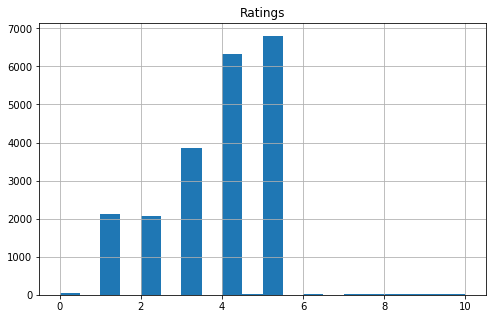

In [10]:
plt.rcParams['figure.figsize'] = (8, 5.0)
scores = pd.DataFrame({"Ratings":data["reviews.rating"]})
scores.hist(bins=20)

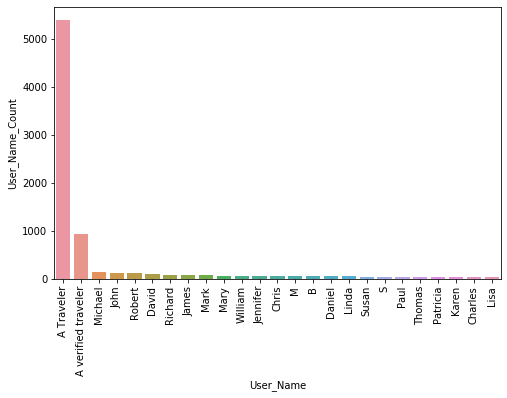

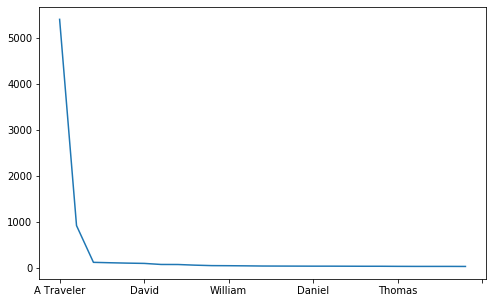

In [11]:
User_Ferq=data['reviews.username'].value_counts()[:25]
sns.barplot(User_Ferq.index,User_Ferq.values)
plt.ylabel('User_Name_Count')
plt.xlabel('User_Name')
plt.xticks(rotation='vertical')
plt.show()

User_Ferq.plot()


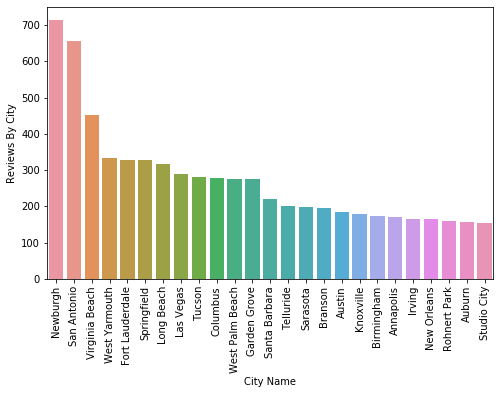

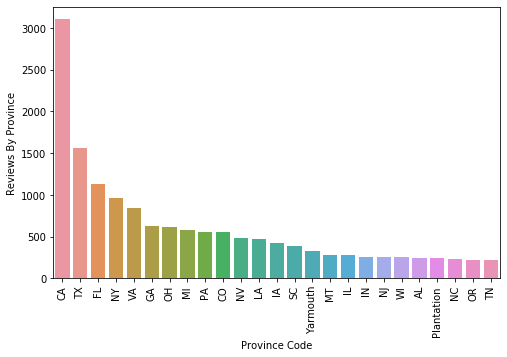

In [12]:
City_Counts = data['city'].value_counts()[:25]
sns.barplot(City_Counts.index,City_Counts.values)
plt.ylabel('Reviews By City')
plt.xlabel('City Name')
plt.xticks(rotation='vertical')
plt.show()

Province_Counts = data['province'].value_counts()[:25]
sns.barplot(Province_Counts.index,Province_Counts.values)
plt.ylabel('Reviews By Province')
plt.xlabel('Province Code')
plt.xticks(rotation='vertical')
plt.show()